Grade=90/100

# Introduction
The purpose of this lab is to further understand the spectrum of an object. To do this, we pointed the telescope away from the sun and took an exposure. We then took the calibration spectra. 

Next we analyzed our spectra by importing our images, taking the average of those images, and then changed these images into a calibration to determine what elements were present.

In [5]:
#le import
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [8]:
#Importing Files
root = '/Users/beechamb/desktop/lsa-ast361/work/beechamb/TeamTurkey/'

spectra1 = np.float64(fits.getdata(root + 'Untitled43.fit'))
spectra2 = np.float64(fits.getdata(root + 'Untitled44.fit'))
spectra3 = np.float64(fits.getdata(root + 'Untitled45.fit'))
spectra4 = np.float64(fits.getdata(root + 'Untitled46.fit'))
spectra5 = np.float64(fits.getdata(root + 'Untitled47.fit'))
CFL = np.float64(fits.getdata(root + 'CFL.fit'))

# Procedure
1 - Import images and use histograms to find the best view.

# Getting all the Images to look right...

(1000, 1450)

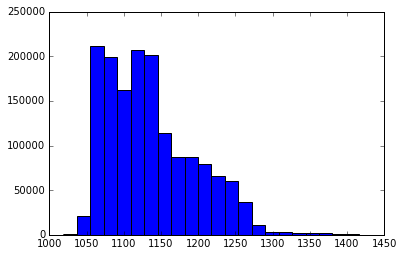

In [9]:
flat1 = spectra1.flatten()
plt.hist(flat1, bins = 3000)
plt.xlim(1000,1450)

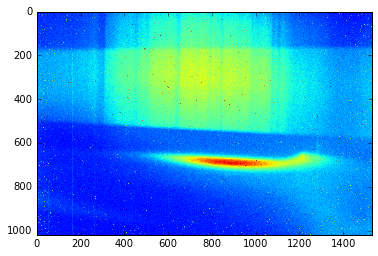

In [10]:
plt.imshow(spectra1, vmin = 1000, vmax = 1450)

(1000, 1400)

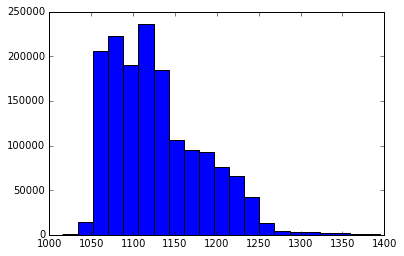

In [11]:
flat2 = spectra2.flatten()
plt.hist(flat2, bins = 3000)
plt.xlim(1000,1400)

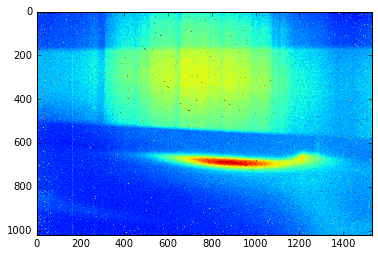

In [12]:
plt.imshow(spectra2, vmin = 1000, vmax = 1400)

(1000, 1380)

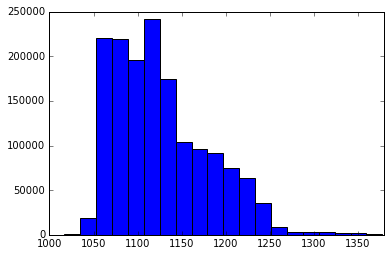

In [13]:
flat3 = spectra3.flatten()
plt.hist(flat3, bins = 3000)
plt.xlim(1000,1380)

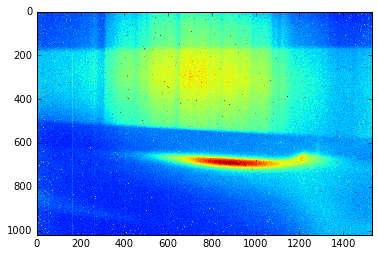

In [14]:
plt.imshow(spectra3, vmin = 1000, vmax = 1380)

(1000, 1400)

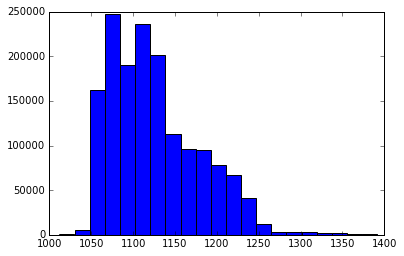

In [15]:
flat4 = spectra4.flatten()
plt.hist(flat4, bins = 3000)
plt.xlim(1000,1400)

In [16]:
plt.imshow(spectra4, vmin = 1000, vmax = 1400)

(1000, 1400)

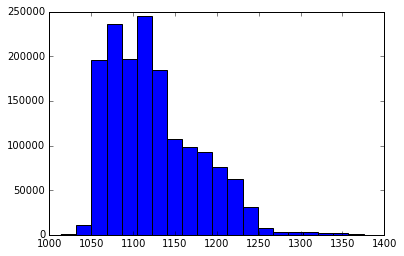

In [17]:
flat5 = spectra5.flatten()
plt.hist(flat5, bins = 3000)
plt.xlim(1000,1400)

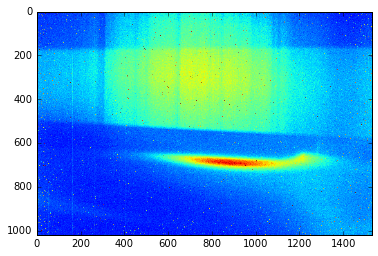

In [18]:
plt.imshow(spectra5, vmin = 1000, vmax = 1400)

# Procedure
2 - Zooming in on the actual part of the spectral image that we want to use.

# Subspectra (from Spectra1)

In [19]:
subspectra1 = spectra1[200:500,:]
plt.imshow(subspectra1, vmin = 1000, vmax = 1400)

In [20]:
subspectra2 = spectra2[200:500,:]
plt.imshow(subspectra2, vmin = 1000, vmax = 1400)

In [21]:
avgspectra = ((spectra2 + spectra3 + spectra4 + spectra5)/4)

# Procedure
3 - Plotting the calibration spectrum, we then cleaned up our spectrum by zooming in and finding "bad" data.

# Ugly Spectra

In [22]:
skyspectra = np.zeros(1530)
for i in range(200,500):
    skyspectra1 = avgspectra[i,:]
    skyspectra = skyspectra + skyspectra1
skyspectra = skyspectra/300.

plt.plot(np.arange(1530),skyspectra)
plt.title('Average Spectra, Spectra Line')
    

# Pretty Spectra

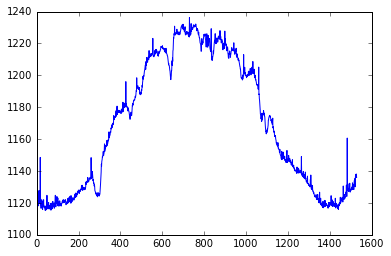

In [23]:
#Prettier
skyspectra[161] = skyspectra[160]
skyspectra[216] = skyspectra[215]
skyspectra[218] = skyspectra[219]
skyspectra[332] = skyspectra[331]
skyspectra[402] = skyspectra[401]
skyspectra[415] = skyspectra[414]
skyspectra[588] = skyspectra[587]
skyspectra[598] = skyspectra[600]
skyspectra[599] = skyspectra[600]
skyspectra[633] = skyspectra[632] 
skyspectra[645] = skyspectra[644]
skyspectra[1476] = skyspectra[1475]
skyspectra[1503] = skyspectra[1502]
skyspectra[1506] = skyspectra[1505]


plt.plot(np.arange(1530),skyspectra)

# CFL

In [24]:
flattened = CFL.flatten()
plt.hist(flattened, bins = 3000)
plt.xlim(990,1200)

(990, 1200)

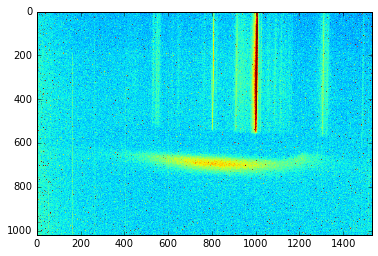

In [25]:
plt.imshow(CFL, vmin = 990, vmax = 1200)

In [26]:
#Subarray
subarraycfl = CFL[200:500:]
plt.imshow(subarraycfl, vmin = 990, vmax = 1200)

# Gross CFL

In [28]:
CFL_Line = np.zeros(1530)
for i in range(200,500):
    CFL_Line1 = CFL[i,:]
    CFL_Line = CFL_Line + CFL_Line1
CFL_Line = CFL_Line/200.
plt.plot(np.arange(1530),CFL_Line)
plt.title('CFL Spectra Line')    
plt.xlabel('Pixel Count')
plt.ylabel('Photon Count')

# Pretty CFL

1598.46
1595.26


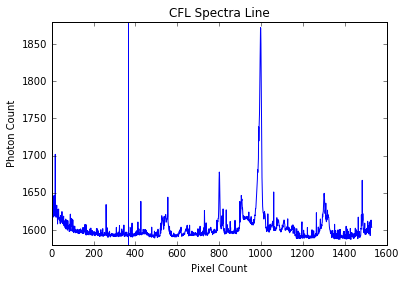

In [39]:
#Making shit better
CFL_Line[161] = CFL_Line[160]
CFL_Line[216] = CFL_Line[215]
CFL_Line[218] = CFL_Line[219]
CFL_Line[332] = CFL_Line[331]
CFL_Line[402] = 1592.68
CFL_Line[415] = 1594.185
CFL_Line[588] = CFL_Line[587]
CFL_Line[598] = CFL_Line[597]
CFL_Line[599] = CFL_Line[600]
CFL_Line[633] = CFL_Line[632] 
CFL_Line[645] = CFL_Line[644]
CFL_Line[1476] = CFL_Line[1475]
CFL_Line[1503] = CFL_Line[1502]
CFL_Line[1506] = CFL_Line[1505]

plt.title('CFL Spectra Line')    
plt.xlabel('Pixel Count')
plt.ylabel('Photon Count')
plt.ylim(1580,1880)


plt.plot(np.arange(1530),CFL_Line)

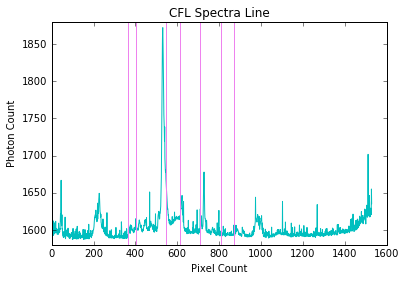

In [65]:
#flipping and finding the right lines...

xvec = np.arange(1530)
xvec = xvec[::-1]
plt.plot(xvec,CFL_Line, color = 'c')

plt.title('CFL Spectra Line')    
plt.xlabel('Pixel Count')
plt.ylabel('Photon Count')
plt.ylim(1580,1880)
#plt.xlim(300,900)

plt.axvline(365, color = 'violet')
plt.axvline(404.6, color = 'violet')
plt.axvline(546, color = 'violet')
plt.axvline(610.8, color = 'violet')
plt.axvline(709, color = 'violet')
plt.axvline(809.4, color = 'violet')
plt.axvline(871.8, color = 'violet')


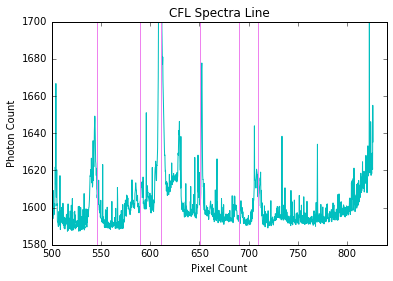

In [219]:
#shrinking nd stretching
xvec = np.arange(1530)
xvec = xvec[::-1]
xvecah = (xvec * .217) + 494.5
plt.plot(xvecah,CFL_Line, color = 'c')

plt.title('CFL Spectra Line')    
plt.xlabel('Pixel Count')
plt.ylabel('Photon Count')
plt.ylim(1580,1700)
plt.xlim(500,840)


plt.axvline(546, color = 'violet')
plt.axvline(589.5, color = 'violet')
plt.axvline(610.8, color = 'violet')
plt.axvline(650.4, color = 'violet')
plt.axvline(690, color = 'violet')
plt.axvline(709, color = 'violet')


# Procedure - Finding the Elements
We used the website https://en.wikipedia.org/wiki/Fraunhofer_lines to find wavelengths and used their given wavelengths to find exactly which elements are in our spectra.

# Calibrating Sky Spectra

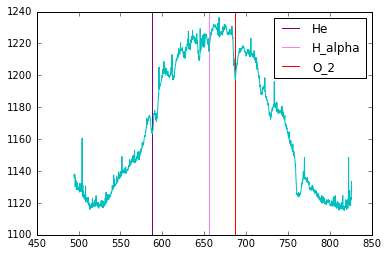

In [229]:
#sky spectra calibration
flip = np.arange(1530)
flip = flip[::-1]
flippp = (flip * .217) + 494.5


plt.axvline(587.5618, color = 'purple', label = 'He')
plt.axvline(656.281, color = 'violet', label = 'H_alpha')
plt.axvline(686.719, color = 'r', label = 'O_2')

plt.legend()
plt.plot(xvecah,skyspectra, color = 'c')

# Conclusions
Through this lab we were able to determine that there was He, H-alpha, and O2 in our spectra. 